In [1]:
from utils.utils_for_fast_inference import get_args, VisionMapper, AudioMapper, build_batch
from utils.build_model import build_model
from utils.volume import volume_computation3
import warnings
import os
warnings.filterwarnings("ignore") 


os.environ['LOCAL_RANK'] = '0'

#Pass the path to the pre-trained model folder
pretrain_dir = '/mnt/media/HDD_4TB/giordano/GRAM/GRAM_pretrained_4modalities'

args = get_args(pretrain_dir)

model,_,_ = build_model(args)
model.to('cuda')

visionMapper = VisionMapper(args.data_cfg.train[0],args)
audioMapper = AudioMapper(args.data_cfg.train[0],args)



tasks = 'ret%tva%tv%ta'


text = ["A dog is barking","A dog is howling", "A red cat is meowing", "A black cat is meowing"]
video = ["./assets/videos/video3.mp4","./assets/videos/video2.mp4","assets/videos/video3.mp4","./assets/videos/video4.mp4"]
audio = ["./assets/audios/audio3.mp3","./assets/audios/audio2.mp3","./assets/audios/audio3.mp3","./assets/audios/audio4.mp3"]

batch = build_batch(args,text,video,audio)


evaluation_dict= model(batch, tasks, compute_loss=False)

feat_t = evaluation_dict['feat_t']
feat_v = evaluation_dict['feat_v']
feat_a = evaluation_dict['feat_a']



volume = volume_computation3(feat_t,feat_v,feat_a)

print("Volume: ", volume.detach().cpu())

language shape: torch.Size([768])
video shape: torch.Size([768])
audio shape: torch.Size([768])
subtitles shape: torch.Size([768])
a shape: torch.Size([3, 768])
G shape: torch.Size([3, 3])
res shape: torch.Size([])
res: tensor(0.0844)
language shape: torch.Size([768])
video shape: torch.Size([768])
audio shape: torch.Size([768])
subtitles shape: torch.Size([768])
a shape: torch.Size([3, 768])
G shape: torch.Size([3, 3])
res shape: torch.Size([])
res: tensor(0.0810)
language shape: torch.Size([768])
video shape: torch.Size([768])
audio shape: torch.Size([768])
subtitles shape: torch.Size([768])
a shape: torch.Size([3, 768])
G shape: torch.Size([3, 3])
res shape: torch.Size([])
res: tensor(0.0822)
language shape: torch.Size([768])
video shape: torch.Size([768])
audio shape: torch.Size([768])
subtitles shape: torch.Size([768])
a shape: torch.Size([3, 768])
G shape: torch.Size([3, 3])
res shape: torch.Size([])
res: tensor(0.0836)
language shape: torch.Size([768])
video shape: torch.Size([7

10/30/2025 17:31:55 - INFO - root -   Loaded EVA01-CLIP-g-14 model config.
10/30/2025 17:32:02 - INFO - root -   Loading pretrained EVA01-CLIP-g-14 weights (./pretrained_weights/clip/EVA01_CLIP_g_14_psz14_s11B.pt).
10/30/2025 17:32:03 - INFO - root -   incompatible_keys.missing_keys: []
10/30/2025 17:32:03 - INFO - model.audio_encoders.beats.beats -   BEATs Config: {'input_patch_size': 16, 'embed_dim': 512, 'conv_bias': False, 'encoder_layers': 12, 'encoder_embed_dim': 768, 'encoder_ffn_embed_dim': 3072, 'encoder_attention_heads': 12, 'activation_fn': 'gelu', 'layer_wise_gradient_decay_ratio': 1.0, 'layer_norm_first': False, 'deep_norm': True, 'dropout': 0.1, 'attention_dropout': 0.1, 'activation_dropout': 0.0, 'encoder_layerdrop': 0.05, 'dropout_input': 0.1, 'conv_pos': 128, 'conv_pos_groups': 16, 'relative_position_embedding': True, 'num_buckets': 320, 'max_distance': 800, 'gru_rel_pos': True, 'finetuned_model': False, 'predictor_dropout': 0.1, 'predictor_class': 527}
Some weights of

args.run_cfg.pretrain_dir /mnt/media/HDD_4TB/giordano/GRAM/GRAM_pretrained_4modalities


10/30/2025 17:32:06 - INFO - __main__ -   load_from_pretrained: /mnt/media/HDD_4TB/giordano/GRAM/GRAM_pretrained_4modalities/ckpt/model_step_459.pt
10/30/2025 17:32:06 - INFO - __main__ -   Load from pretrained dir /mnt/media/HDD_4TB/giordano/GRAM/GRAM_pretrained_4modalities
10/30/2025 17:32:06 - INFO - __main__ -   Unexpected keys []
10/30/2025 17:32:06 - INFO - __main__ -   missing_keys  ['contra_head_d.linear.weight']
10/30/2025 17:32:07 - INFO - __main__ -   youcook_ret Using clip mean and std.
10/30/2025 17:32:07 - INFO - __main__ -   youcook_ret transforms none
10/30/2025 17:32:07 - INFO - __main__ -   youcook_ret Using clip mean and std.
10/30/2025 17:32:07 - INFO - __main__ -   youcook_ret transforms none
[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.
[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.


gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
Using adaptive frame embedding for vision
Interpolating frame em

In [2]:
volume.shape

torch.Size([4, 4])

In [3]:
evaluation_dict.keys()

dict_keys(['feat_t', 'feat_v', 'feat_a', 'feat_v_all', 'input_ids', 'attention_mask', 'condition_feats_tva', 'condition_feats_tv', 'condition_feats_ta', 'condition_feats_v_not_reshaped'])

In [4]:
condition_feats_va = evaluation_dict['condition_feats_tva']
print(condition_feats_va.shape)

condition_feats_v = evaluation_dict['condition_feats_tv']
print(condition_feats_v.shape)

condition_feats_a = evaluation_dict['condition_feats_ta']
print(condition_feats_a.shape)

torch.Size([4, 770, 768])
torch.Size([4, 514, 768])
torch.Size([4, 256, 768])


In [5]:
import torch
#interpolate audio token to match vision tokens at dimension 2
condition_feats_a_interpolated = torch.nn.functional.interpolate(condition_feats_a.permute(0,2,1), size=condition_feats_v.shape[1], mode='linear', align_corners=False).permute(0,2,1)
print(condition_feats_a_interpolated.shape)

condition_feats_a_interpolated = torch.nn.functional.interpolate(
    condition_feats_a.permute(0, 2, 1).unsqueeze(-1),  # [1, 768, 256, 1]
    size=(condition_feats_v.shape[1], 1),                      # target size for (H, W)
    mode='bilinear',                    # or 'nearest', 'linear'
    align_corners=False
).squeeze(-1).permute(0, 2, 1)
print(condition_feats_a_interpolated.shape)

condition_for_multimodal_self_attention = torch.cat([condition_feats_v.unsqueeze(1), condition_feats_a_interpolated.unsqueeze(1)], dim=1)
print(condition_for_multimodal_self_attention.shape)

condition_strange = torch.cat([condition_feats_v, condition_feats_a_interpolated], dim=1)
print(condition_strange.shape)

torch.Size([4, 514, 768])
torch.Size([4, 514, 768])
torch.Size([4, 2, 514, 768])
torch.Size([4, 1028, 768])


In [6]:
import torch
from tqdm import tqdm

def refine_score_matrix_single_gpu(
    condition_feats, 
    input_ids, 
    attention_mask, 
    score_matrix_t_cond, 
    model, 
    itm_rerank_num, 
    direction='forward',
    gram_attention=False
):
    """
    Refines the score matrix for a single-GPU setup (no distributed operations).

    Args:
        condition_feats (torch.Tensor): Condition features, shape (N, ...).
        input_ids (torch.Tensor): Input token IDs.
        attention_mask (torch.Tensor): Attention mask.
        score_matrix_t_cond (torch.Tensor): Initial score matrix, shape (N, M).
        model (nn.Module): Model with a `compute_slice_scores` method.
        itm_rerank_num (int): Number of top-k items to rerank.
        direction (str): 'forward' or 'backward' for top-k selection.

    Returns:
        torch.Tensor: Refined score matrix of shape (N, M).
    """

    top_k = itm_rerank_num

    # Determine top-k indices depending on direction
    if direction == 'forward':
        idxs = score_matrix_t_cond.topk(top_k, dim=1)[1]
    else:
        idxs = score_matrix_t_cond.topk(top_k, dim=0)[1]

    # Initialize mask for selected pairs
    score_matrix_t_cond_new = torch.zeros_like(score_matrix_t_cond)
    idxs_new = torch.zeros_like(score_matrix_t_cond_new).long()

    if direction == 'forward':
        for i in range(len(idxs)):
            for j in idxs[i]:
                idxs_new[i][j] = 1
    else:
        for i in range(idxs.shape[1]):
            for j in idxs[:, i]:
                idxs_new[j][i] = 1

    cur_length = condition_feats.shape[0]

    # Initialize progress bar
    pbar = tqdm(total=cur_length, desc="Refining score matrix")

    # Loop through each condition vector
    for i in range(cur_length):
        selected_mask = (idxs_new[:, i] == 1)
        if selected_mask.sum() == 0:
            continue

        cur_input_ids = input_ids[selected_mask]
        cur_attention_mask = attention_mask[selected_mask]
        if gram_attention:
            cur_condition_feats = condition_feats[i].unsqueeze(0).expand(cur_input_ids.shape[0], -1, -1, -1)
        else:
            cur_condition_feats = condition_feats[i].unsqueeze(0).expand(cur_input_ids.shape[0], -1, -1)
        cur_scores = []
        total_len = len(cur_condition_feats)
        small_batch = 25
        num_batches = (total_len + small_batch - 1) // small_batch

        # Compute scores in mini-batches to avoid OOM
        for k in range(num_batches):
            start = k * small_batch
            end = (k + 1) * small_batch
            slice_input_ids = cur_input_ids[start:end]
            slice_attention_mask = cur_attention_mask[start:end]
            slice_condition_feats = cur_condition_feats[start:end]
            slice_scores = model.compute_slice_scores(slice_condition_feats, slice_input_ids, slice_attention_mask, gram_attention=gram_attention)
            cur_scores.append(slice_scores)

        cur_scores = torch.cat(cur_scores, dim=0)
        score_matrix_t_cond_new[:, i][selected_mask] = cur_scores

        pbar.update(1)

    pbar.close()

    # No need for distributed all-gather — return directly
    return score_matrix_t_cond_new


In [7]:

input_ids = evaluation_dict['input_ids']
attention_mask = evaluation_dict['attention_mask']
itm_rerank_num = 4

score_matrix = refine_score_matrix_single_gpu(condition_feats_va, input_ids, attention_mask, -volume, model, itm_rerank_num, direction='backward')

Refining score matrix:   0%|          | 0/4 [00:00<?, ?it/s]

Slice multimodal vision input shape: torch.Size([4, 770, 768])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_layer shape: torch.Size([4, 12, 770, 64])
value_layer shape: torch.Size([4, 12, 770, 64])
attention_scores shape: torch.Size([4, 12, 40, 770])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_layer shape: torch.Size([4, 12, 770, 64])
value_layer shape: torch.Size([4, 12, 770, 64])
attention_scores shape: torch.Size([4, 12, 40, 770])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_layer shape: torch.Size([4, 12, 770, 64])
value_layer shape: torch.Size([4, 12, 770, 64])
attention_scores shape: torch.Size([4, 12, 40, 770])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_laye

Refining score matrix:  25%|██▌       | 1/4 [00:00<00:02,  1.02it/s]

Slice multimodal vision input shape: torch.Size([4, 770, 768])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_layer shape: torch.Size([4, 12, 770, 64])
value_layer shape: torch.Size([4, 12, 770, 64])
attention_scores shape: torch.Size([4, 12, 40, 770])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_layer shape: torch.Size([4, 12, 770, 64])
value_layer shape: torch.Size([4, 12, 770, 64])
attention_scores shape: torch.Size([4, 12, 40, 770])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_layer shape: torch.Size([4, 12, 770, 64])
value_layer shape: torch.Size([4, 12, 770, 64])
attention_scores shape: torch.Size([4, 12, 40, 770])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_laye

Refining score matrix:  50%|█████     | 2/4 [00:02<00:02,  1.00s/it]

Slice multimodal vision input shape: torch.Size([4, 770, 768])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_layer shape: torch.Size([4, 12, 770, 64])
value_layer shape: torch.Size([4, 12, 770, 64])
attention_scores shape: torch.Size([4, 12, 40, 770])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_layer shape: torch.Size([4, 12, 770, 64])
value_layer shape: torch.Size([4, 12, 770, 64])
attention_scores shape: torch.Size([4, 12, 40, 770])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_layer shape: torch.Size([4, 12, 770, 64])
value_layer shape: torch.Size([4, 12, 770, 64])
attention_scores shape: torch.Size([4, 12, 40, 770])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_laye

Refining score matrix:  75%|███████▌  | 3/4 [00:02<00:00,  1.03it/s]

Slice multimodal vision input shape: torch.Size([4, 770, 768])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_layer shape: torch.Size([4, 12, 770, 64])
value_layer shape: torch.Size([4, 12, 770, 64])
attention_scores shape: torch.Size([4, 12, 40, 770])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_layer shape: torch.Size([4, 12, 770, 64])
value_layer shape: torch.Size([4, 12, 770, 64])
attention_scores shape: torch.Size([4, 12, 40, 770])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_layer shape: torch.Size([4, 12, 770, 64])
value_layer shape: torch.Size([4, 12, 770, 64])
attention_scores shape: torch.Size([4, 12, 40, 770])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: False
key_laye

Refining score matrix: 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


In [8]:
score_matrix

tensor([[0.0123, 0.9143, 0.0151, 0.0278],
        [0.0024, 0.9860, 0.0038, 0.0082],
        [0.4783, 0.0124, 0.4486, 0.1154],
        [0.1444, 0.0135, 0.1490, 0.9952]], device='cuda:0',
       grad_fn=<CopySlices>)

In [9]:

input_ids = evaluation_dict['input_ids']
attention_mask = evaluation_dict['attention_mask']
itm_rerank_num = 4

score_matrix = refine_score_matrix_single_gpu(condition_for_multimodal_self_attention, input_ids, attention_mask, -volume, model, itm_rerank_num, direction='forward', gram_attention=True)

Refining score matrix:   0%|          | 0/4 [00:00<?, ?it/s]

Slice multimodal vision input shape: torch.Size([4, 2, 514, 768])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: True
Using gram_attention cross attention
key_1_layer shape: torch.Size([4, 12, 514, 64])
key_2_layer shape: torch.Size([4, 12, 514, 64])
value_1_layer shape: torch.Size([4, 12, 514, 64])
value_2_layer shape: torch.Size([4, 12, 514, 64])
Saving gram_attention past_key_value
Query layer shape: torch.Size([4, 12, 40, 64])
attention_scores for batch 0 shape: torch.Size([12, 40, 514])
attention_scores for batch 1 shape: torch.Size([12, 40, 514])
attention_scores for batch 2 shape: torch.Size([12, 40, 514])
attention_scores for batch 3 shape: torch.Size([12, 40, 514])
Final attention_scores shape: torch.Size([4, 12, 40, 514])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: True
Using gram_attention cross attention
key_1_layer shape: torch.Size([

Refining score matrix:  25%|██▌       | 1/4 [00:00<00:01,  1.92it/s]

attention_scores for batch 1 shape: torch.Size([12, 40, 514])
attention_scores for batch 2 shape: torch.Size([12, 40, 514])
attention_scores for batch 3 shape: torch.Size([12, 40, 514])
Final attention_scores shape: torch.Size([4, 12, 40, 514])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: True
Using gram_attention cross attention
key_1_layer shape: torch.Size([4, 12, 514, 64])
key_2_layer shape: torch.Size([4, 12, 514, 64])
value_1_layer shape: torch.Size([4, 12, 514, 64])
value_2_layer shape: torch.Size([4, 12, 514, 64])
Saving gram_attention past_key_value
Query layer shape: torch.Size([4, 12, 40, 64])
attention_scores for batch 0 shape: torch.Size([12, 40, 514])
attention_scores for batch 1 shape: torch.Size([12, 40, 514])
attention_scores for batch 2 shape: torch.Size([12, 40, 514])
attention_scores for batch 3 shape: torch.Size([12, 40, 514])
Final attention_scores shape: torch.Size([4, 12, 40, 514])
gram_atten

Refining score matrix:  50%|█████     | 2/4 [00:01<00:01,  1.29it/s]

Slice multimodal vision input shape: torch.Size([4, 2, 514, 768])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: True
Using gram_attention cross attention
key_1_layer shape: torch.Size([4, 12, 514, 64])
key_2_layer shape: torch.Size([4, 12, 514, 64])
value_1_layer shape: torch.Size([4, 12, 514, 64])
value_2_layer shape: torch.Size([4, 12, 514, 64])
Saving gram_attention past_key_value
Query layer shape: torch.Size([4, 12, 40, 64])
attention_scores for batch 0 shape: torch.Size([12, 40, 514])
attention_scores for batch 1 shape: torch.Size([12, 40, 514])
attention_scores for batch 2 shape: torch.Size([12, 40, 514])
attention_scores for batch 3 shape: torch.Size([12, 40, 514])
Final attention_scores shape: torch.Size([4, 12, 40, 514])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: True
Using gram_attention cross attention
key_1_layer shape: torch.Size([

Refining score matrix:  75%|███████▌  | 3/4 [00:02<00:00,  1.43it/s]

Slice multimodal vision input shape: torch.Size([4, 2, 514, 768])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: True
Using gram_attention cross attention
key_1_layer shape: torch.Size([4, 12, 514, 64])
key_2_layer shape: torch.Size([4, 12, 514, 64])
value_1_layer shape: torch.Size([4, 12, 514, 64])
value_2_layer shape: torch.Size([4, 12, 514, 64])
Saving gram_attention past_key_value
Query layer shape: torch.Size([4, 12, 40, 64])
attention_scores for batch 0 shape: torch.Size([12, 40, 514])
attention_scores for batch 1 shape: torch.Size([12, 40, 514])
attention_scores for batch 2 shape: torch.Size([12, 40, 514])
attention_scores for batch 3 shape: torch.Size([12, 40, 514])
Final attention_scores shape: torch.Size([4, 12, 40, 514])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: True
Using gram_attention cross attention
key_1_layer shape: torch.Size([

Refining score matrix: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: True
Using gram_attention cross attention
key_1_layer shape: torch.Size([4, 12, 514, 64])
key_2_layer shape: torch.Size([4, 12, 514, 64])
value_1_layer shape: torch.Size([4, 12, 514, 64])
value_2_layer shape: torch.Size([4, 12, 514, 64])
Saving gram_attention past_key_value
Query layer shape: torch.Size([4, 12, 40, 64])
attention_scores for batch 0 shape: torch.Size([12, 40, 514])
attention_scores for batch 1 shape: torch.Size([12, 40, 514])
attention_scores for batch 2 shape: torch.Size([12, 40, 514])
attention_scores for batch 3 shape: torch.Size([12, 40, 514])
Final attention_scores shape: torch.Size([4, 12, 40, 514])
gram_attention in : False
attention_scores shape: torch.Size([4, 12, 40, 40])
gram_attention in BertCrossAttention: True
Using gram_attention cross attention
key_1_layer shape: torch.Size([4, 12, 514, 64])
key_2_layer shape: torch.Size([4, 12, 514, 64])
v

In [10]:
score_matrix

tensor([[0.3127, 0.5767, 0.3184, 0.4021],
        [0.1032, 0.5226, 0.1095, 0.1031],
        [0.3226, 0.0513, 0.3031, 0.3458],
        [0.2891, 0.0836, 0.2603, 0.4277]], device='cuda:0',
       grad_fn=<CopySlices>)

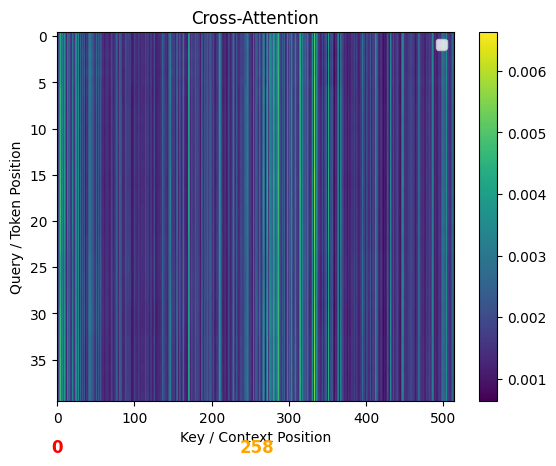

In [14]:
import matplotlib.pyplot as plt
head = torch.load("/mnt/media/HDD_4TB/giordano/GRAM/attention_probs_layer_11.pt")
head = head[0,0,:,:].detach().cpu().numpy()

plt.imshow(head, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Cross-Attention')
plt.xlabel('Key / Context Position')
plt.ylabel('Query / Token Position')

# Add vertical lines to highlight tokens 0 and 258
#plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Token 0')
#plt.axvline(x=258, color='orange', linestyle='--', linewidth=2, label='Token 258')

# Highlight the bottom numbers by adding text annotations
plt.text(0, head.shape[0]+5, '0', color='red', fontsize=12, fontweight='bold', ha='center')
plt.text(258, head.shape[0]+5, '258', color='orange', fontsize=12, fontweight='bold', ha='center')
plt.legend()
plt.show()


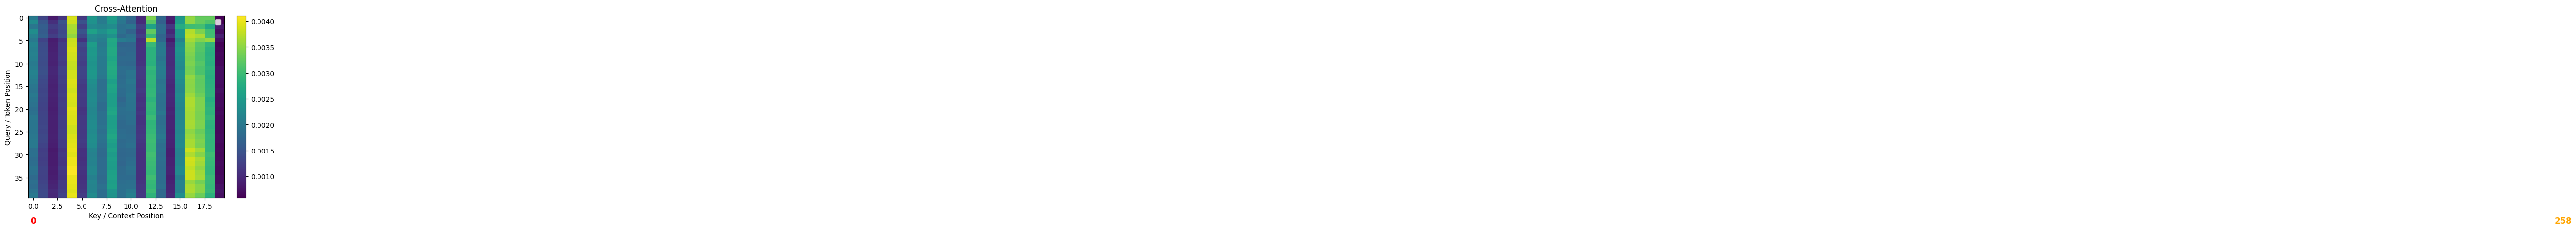

In [12]:
import matplotlib.pyplot as plt
plt.imshow(head[:, 250:270], cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Cross-Attention')
plt.xlabel('Key / Context Position')
plt.ylabel('Query / Token Position')

# Add vertical lines to highlight tokens 0 and 258
#plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Token 0')
#plt.axvline(x=258, color='orange', linestyle='--', linewidth=2, label='Token 258')

# Highlight the bottom numbers by adding text annotations
plt.text(0, head.shape[0]+5, '0', color='red', fontsize=12, fontweight='bold', ha='center')
plt.text(258, head.shape[0]+5, '258', color='orange', fontsize=12, fontweight='bold', ha='center')

plt.legend()
plt.show()